In [95]:
from pathlib import Path
from typing import List
import gzip
import numpy as np
import pandas as pd

import torch.utils.data as Data 
import torch
import matplotlib.pyplot as plt
from torch import nn ,optim
from nilearn.image import smooth_img

In [2]:
if torch.cuda.is_available():
    device=torch.device('cuda')
    print("GPU获取")

GPU获取


In [3]:
data_participants_dir='E:/Data/participants1.tsv'#获取全部实验者的数据
data_participants_tsv=pd.read_csv(data_participants_dir,sep='\t')
data_NoNaN=data_participants_tsv.dropna(axis=0,how='any')#去除NAN无效数据
data_id=data_NoNaN.participant_id
data_age=data_NoNaN.age
display(data_NoNaN)

,participant_id,age,sex,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
1,sub-0002,21.00,F,23.0,right,academic,no,27.0,27,53,40,48,34
2,sub-0003,23.00,M,22.0,right,academic,no,22.0,35,40,43,37,38
3,sub-0004,23.50,F,22.0,right,applied,no,21.0,29,47,41,48,41
4,sub-0005,21.75,M,19.0,ambidextrous,applied,no,28.0,26,35,40,38,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,sub-0212,20.50,F,29.0,ambidextrous,applied,no,19.0,24,44,29,47,41
212,sub-0213,19.75,M,26.0,right,applied,no,18.0,20,50,40,46,39
213,sub-0214,19.50,M,19.0,right,applied,no,19.0,24,50,37,46,56
214,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48


In [4]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [9]:
def create_age_array(count,data):
    for i in data:
        if i<=20:
            count[0]+=1
        elif i<=21:
            count[1]+=1
        elif i<=22:
            count[2]+=1
        elif i<=23:
            count[3]+=1
        elif i<=24:
            count[4]+=1
        elif i<=25:
            count[5]+=1
        else:
            count[6]+=1
    return count

<BarContainer object of 7 artists>

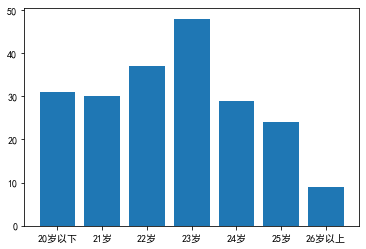

In [42]:
count=np.array([0,0,0,0,0,0,0])
count=create_age_array(count,data_age)
name_list = ['20岁以下','21岁','22岁','23岁','24岁','25岁','26岁以上']  
plt.bar(range(len(name_list)), count,tick_label=name_list) 

In [57]:
count

array([31, 30, 37, 48, 29, 24,  9])

In [17]:
data2_participants_dir='E:/Data/participants2.tsv'#获取全部实验者的数据
data2_participants_tsv=pd.read_csv(data2_participants_dir,sep='\t')
data2_NoNaN=data2_participants_tsv.dropna(axis=0,how='any')#去除NAN无效数据
data2_id=data2_NoNaN.participant_id
data2_age=data2_NoNaN.age
len(data2_age)

224

In [65]:
count2=np.array([0,0,0,0,0,0,0])
count2=create_age_array(count2,data2_age)
name_list2 = ['20岁以下','21岁','22岁','23岁','24岁','25岁','26岁以上']  
count2

array([35, 50, 37, 41, 28, 27,  6])

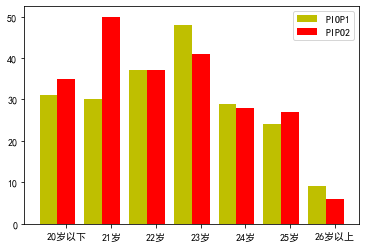

In [70]:
width=0.4
x =list(range(len(name_list)))  
plt.bar(x, count, width=width, label='PIOP1',fc = 'y')
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, count2, width=width, label='PIPO2',tick_label = name_list,fc = 'r')
plt.legend()  


In [77]:
data_BMI=data_NoNaN.BMI

data_BMI_int=data_BMI.astype(np.int16)

In [87]:
def create_BMI_array(count,data):
    for i in data:
        if i<=18:
            count[0]+=1
        elif i>=29:
            count[11]+=1
        else :
            
            count[i-18]+=1
         
    return count

1


In [88]:
count=np.array([0,0,0,0,0,0,0,0,0,0,0,0])
count=create_BMI_array(count,data_BMI_int)
name_list = ['18以下','19','20','21','22','23','24','25','26','27','28','29以上']  
count

array([ 4, 23, 30, 34, 35, 33, 19, 16,  4,  1,  4,  5])

In [93]:
data2_BMI=data2_NoNaN.BMI
data2_BMI_int=data2_BMI.astype(np.int16)
count2=np.array([0,0,0,0,0,0,0,0,0,0,0,0])
count2=create_BMI_array(count2,data2_BMI_int)
name_list = ['18以下','19','20','21','22','23','24','25','26','27','28','29以上'] 
count2

array([10, 19, 24, 26, 36, 38, 23, 18, 12,  7,  4,  7])

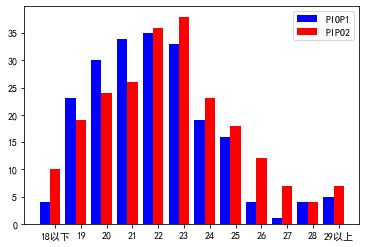

In [94]:
width=0.4
x =list(range(len(name_list)))  
plt.bar(x, count, width=width, label='PIOP1',fc = 'b')
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, count2, width=width, label='PIPO2',tick_label = name_list,fc = 'r')
plt.legend() 

21.0
22.0
23.0
18.0
27.0
22.0
23.0
23.0
23.0
21.0
21.0
26.0
19.0
20.0
16.0
24.0
26.0
25.0
25.0
23.0
30.0
24.0
21.0
24.0
21.0
23.0
19.0
22.0
23.0
20.0
18.0
22.0
19.0
23.0
25.0
43.0
24.0
25.0
21.0
19.0
18.0
19.0
19.0
22.0
25.0
19.0
20.0
23.0
23.0
20.0
21.0
24.0
26.0
21.0
27.0
20.0
27.0
24.0
22.0
26.0
28.0
22.0
20.0
24.0
24.0
20.0
21.0
29.0
23.0
19.0
26.0
17.0
27.0
22.0
21.0
23.0
19.0
24.0
23.0
30.0
22.0
25.0
25.0
24.0
18.0
19.0
25.0
23.0
19.0
22.0
20.0
25.0
20.0
22.0
20.0
28.0
20.0
23.0
25.0
22.0
20.0
22.0
22.0
23.0
23.0
19.0
23.0
21.0
22.0
22.0
22.0
23.0
24.0
23.0
18.0
17.0
21.0
18.0
22.0
26.0
26.0
22.0
23.0
24.0
22.0
23.0
23.0
29.0
20.0
24.0
22.0
23.0
25.0
30.0
20.0
20.0
22.0
19.0
21.0
25.0
25.0
18.0
20.0
19.0
19.0
26.0
24.0
28.0
20.0
23.0
21.0
26.0
22.0
22.0
19.0
33.0
22.0
24.0
22.0
25.0
23.0
23.0
21.0
22.0
27.0
23.0
20.0
27.0
23.0
21.0
24.0
20.0
22.0
27.0
19.0
23.0
20.0
25.0
22.0
21.0
23.0
24.0
20.0
21.0
23.0
26.0
21.0
19.0
24.0
24.0
21.0
21.0
23.0
26.0
24.0
22.0
24.0
21.0
24.0
22.0
